In [49]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Time setup
fs = 1000  # Hz
t = np.arange(0, 0.7, 1/fs)  # 2 seconds

# Frequencies
theta_freq = 6
gamma_freq = 80

# Theta amplitude modulation (slow fluctuation)
theta_amp_mod = 1 + 0.5 * np.sin(2 * np.pi * 0.5 * t)

# Noisy theta
theta = theta_amp_mod * np.sin(2 * np.pi * theta_freq * t)
theta += 0.05 * np.random.randn(len(t))

# Raw gamma (unmodulated)
gamma_raw = np.sin(2 * np.pi * gamma_freq * t)
gamma_raw += 0.3 * np.random.randn(len(t))

# Gamma bursts centered on theta phase = 0
theta_phase = np.angle(np.exp(1j * 2 * np.pi * theta_freq * t))
gamma_burst_mask = np.exp(-((theta_phase / 1.3) ** 2))

# PAC-modulated gamma (amplitude & phase coupling)
gamma_amp_mod = theta_amp_mod * gamma_burst_mask
gamma_pac = gamma_amp_mod * np.sin(2 * np.pi * gamma_freq * t)
gamma_pac += 0.3 * np.random.randn(len(t))

# Create Plotly figure
fig = make_subplots(
    rows=3, cols=1, shared_xaxes=True, vertical_spacing=0.05,
    subplot_titles=(
        "Theta (6 Hz)",
        "Gamma (80 Hz)",
        "Theta-gamma PAC"
    )
)

# Customize subplot title fonts
for annotation in fig['layout']['annotations']:
    annotation.font.size = 24          # Change font size
    annotation.font.family = "Arial"   # Change font family
    annotation.font.color = "black"    # Change font color (e.g., 'gray', '#333333')


# Row 1: Theta
fig.add_trace(go.Scatter(
    x=t, y=theta, mode='lines',
    line=dict(color='#C83F69', width=2.5)), row=1, col=1)

# Row 2: Raw Gamma
fig.add_trace(go.Scatter(
    x=t, y=gamma_raw, mode='lines',
    line=dict(color='#8BC34A', width=2.5)), row=2, col=1)

# Row 3: PAC Gamma
fig.add_trace(go.Scatter(
    x=t, y=gamma_pac, mode='lines',
    line=dict(color='#5A3FC8', width=2.5)), row=3, col=1)

# Layout
fig.update_layout(
    height=800, width=1000,
    template="simple_white",
    font=dict(size=14),
    showlegend=False,
    paper_bgcolor='rgba(0,0,0,0)',   # full figure background
    plot_bgcolor='rgba(0,0,0,0)',
)

# Axes
# fig.update_xaxes(title_text="Time (s)", row=3, col=1)
# for i in range(1, 4):
#     fig.update_yaxes(title_text="Amplitude", row=i, col=1)
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)


fig.show()

# save to C:\Users\a1902989\Box\BonoKat\#PhD Adelaide\# schools and conferences\OHBM\poster

(np.float64(-0.04995), np.float64(1.04895), np.float64(-1.1), np.float64(1.1))

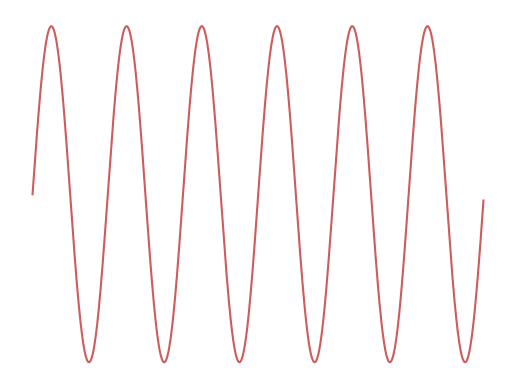

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Time vector
fs = 1000  # Hz
t = np.linspace(0, 1, fs, endpoint=False)

# Low-frequency signal (theta: ~6 Hz)
f_low = 6
theta = np.sin(2 * np.pi * f_low * t)

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(8, 4), sharex=True)

plt.plot(t, theta, color='indianred')
plt.axis('off')

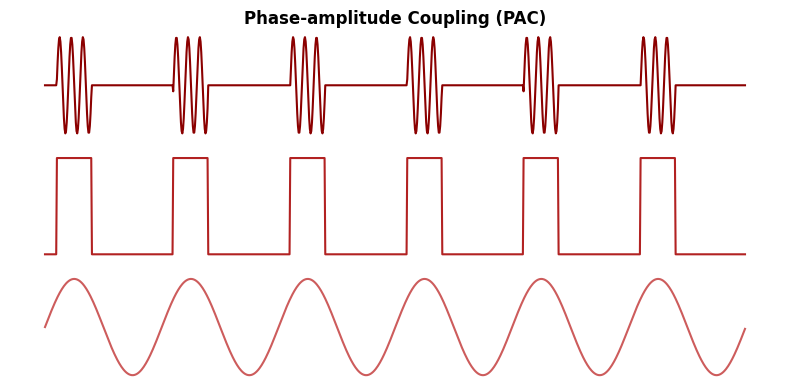

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Time vector
fs = 1000  # Hz
t = np.linspace(0, 1, fs, endpoint=False)

# Low-frequency signal (theta: ~6 Hz)
f_low = 6
theta = np.sin(2 * np.pi * f_low * t)

# High-frequency burst (gamma: ~60 Hz)
f_high = 60
gamma_burst = np.sin(2 * np.pi * f_high * t)

# Create a burst mask: only turn on gamma around theta peaks
burst_duration = 0.05  # seconds (50 ms)
burst_samples = int(burst_duration * fs / 2)

# Detect peaks of theta
peaks, _ = find_peaks(theta)

# Create a mask to turn gamma on only near theta peaks
burst_mask = np.zeros_like(t)
for p in peaks:
    start = max(0, p - burst_samples)
    end = min(len(t), p + burst_samples)
    burst_mask[start:end] = 1

# Apply mask to gamma
gamma = burst_mask * gamma_burst

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(8, 4), sharex=True)

# # Full PAC signal (top)
# axes[0].plot(t, gamma, color='darkred')
# axes[0].set_title('Phase-amplitude Coupling (PAC)', fontsize=12, weight='bold')
# axes[0].axis('off')

# # Gamma burst presence (middle)
# axes[1].plot(t, burst_mask, color='firebrick')
# axes[1].axis('off')

# Theta (low-frequency phase) signal (bottom)
axes[2].plot(t, theta, color='indianred')
axes[2].axis('off')

# Layout
fig.tight_layout()
plt.show()
